In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import ema_workbench
import seaborn as sns
from ema_workbench import load_results

experiments, outcomes = load_results('Week23_reference_case_2000_6.tar.gz')
df_exp = pd.DataFrame.from_dict(experiments)
df_out = pd.DataFrame.from_dict(outcomes)

In [2]:
df_exp

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,114,328.682725,1.5,0.713485,139.532438,1.0,0.515097,228.360825,10.0,0.865021,...,0,1,0,0,1,0,0,2000,0,dikesnet
1,18,271.151740,10.0,0.041304,43.558330,10.0,0.133565,202.056870,1.0,0.096704,...,0,1,0,0,1,0,0,2001,0,dikesnet
2,90,197.650243,1.0,0.740644,62.931004,1.0,0.054134,109.606651,1.0,0.293149,...,0,1,0,0,1,0,0,2002,0,dikesnet
3,95,267.976883,1.0,0.783014,66.409068,10.0,0.472811,230.959702,1.0,0.818138,...,0,1,0,0,1,0,0,2003,0,dikesnet
4,23,44.151139,1.5,0.419052,55.031186,1.0,0.080026,233.709638,1.5,0.976588,...,0,1,0,0,1,0,0,2004,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,32,109.898647,10.0,0.220167,138.864127,1.0,0.539569,169.620790,1.5,0.436351,...,0,0,0,0,0,0,0,3995,5,dikesnet
11996,103,265.025510,1.5,0.443085,49.628131,1.0,0.562165,84.138305,1.5,0.799322,...,0,0,0,0,0,0,0,3996,5,dikesnet
11997,34,108.275372,1.0,0.593292,346.476214,1.5,0.217539,163.567916,1.5,0.965051,...,0,0,0,0,0,0,0,3997,5,dikesnet
11998,73,281.357288,1.5,0.907884,175.526513,1.0,0.825676,335.324553,1.5,0.084136,...,0,0,0,0,0,0,0,3998,5,dikesnet


In [8]:
df_tot = pd.concat([df_exp, df_out], axis=1)
df_tot_p0= df_tot[df_tot['policy']==0]
df_tot_p1= df_tot[df_tot['policy']==1]
df_tot_p2= df_tot[df_tot['policy']==2]
df_tot_p3= df_tot[df_tot['policy']==3]
df_tot_p4= df_tot[df_tot['policy']==4]
df_tot_p5= df_tot[df_tot['policy']==5]

df_tot_p0

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model,Expected Annual Damage A4,Expected Annual Damage A5,Expected Number of Deaths in A4,Expected Number of Deaths in A5,Total Costs
0,114,328.682725,1.5,0.713485,139.532438,1.0,0.515097,228.360825,10.0,0.865021,...,0,0,2000,0,dikesnet,0.000000e+00,1.055849e+09,0.000000,1.061388,1.196643e+09
1,18,271.151740,10.0,0.041304,43.558330,10.0,0.133565,202.056870,1.0,0.096704,...,0,0,2001,0,dikesnet,0.000000e+00,0.000000e+00,0.000000,0.000000,2.470161e+09
2,90,197.650243,1.0,0.740644,62.931004,1.0,0.054134,109.606651,1.0,0.293149,...,0,0,2002,0,dikesnet,5.148609e+06,0.000000e+00,0.002026,0.000000,1.306670e+09
3,95,267.976883,1.0,0.783014,66.409068,10.0,0.472811,230.959702,1.0,0.818138,...,0,0,2003,0,dikesnet,0.000000e+00,0.000000e+00,0.000000,0.000000,1.793552e+08
4,23,44.151139,1.5,0.419052,55.031186,1.0,0.080026,233.709638,1.5,0.976588,...,0,0,2004,0,dikesnet,1.713662e+07,0.000000e+00,0.007911,0.000000,1.088269e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,32,109.898647,10.0,0.220167,138.864127,1.0,0.539569,169.620790,1.5,0.436351,...,0,0,3995,0,dikesnet,8.589139e+07,0.000000e+00,0.031714,0.000000,4.743243e+08
1996,103,265.025510,1.5,0.443085,49.628131,1.0,0.562165,84.138305,1.5,0.799322,...,0,0,3996,0,dikesnet,2.971145e+06,0.000000e+00,0.002001,0.000000,1.329333e+08
1997,34,108.275372,1.0,0.593292,346.476214,1.5,0.217539,163.567916,1.5,0.965051,...,0,0,3997,0,dikesnet,0.000000e+00,0.000000e+00,0.000000,0.000000,5.097466e+08
1998,73,281.357288,1.5,0.907884,175.526513,1.0,0.825676,335.324553,1.5,0.084136,...,0,0,3998,0,dikesnet,0.000000e+00,0.000000e+00,0.000000,0.000000,2.118404e+09


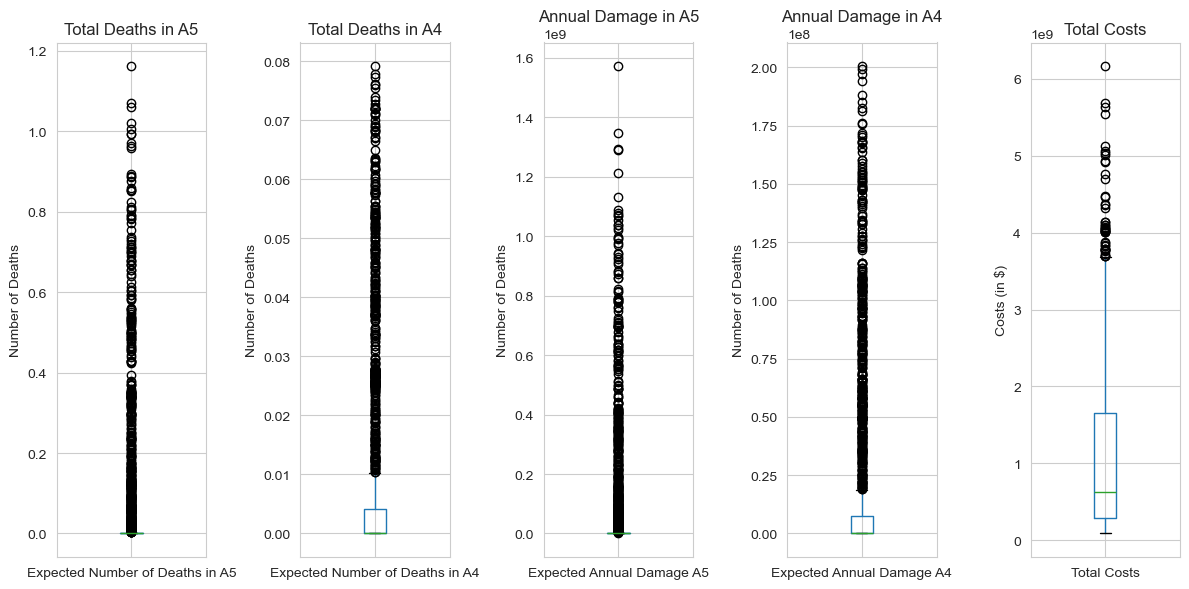

In [13]:
df_tot_p0_costs = df_tot_p0[['Total Costs']]
df_tot_p0_deathsA5 = df_tot_p0[['Expected Number of Deaths in A5']]
df_tot_p0_deathsA4 = df_tot_p0[['Expected Number of Deaths in A4']]
df_tot_p0_damageA5 = df_tot_p0[['Expected Annual Damage A5']]
df_tot_p0_damageA4 = df_tot_p0[['Expected Annual Damage A4']]
fig, axs = plt.subplots(1, 5, figsize=(12, 6))

# Boxplot for df_out_deaths in A5
df_tot_p0_deathsA5.boxplot(ax=axs[0])
axs[0].set_title('Total Deaths in A5')
axs[0].set_ylabel('Deaths')

# Boxplot for df_out_deaths in A4
df_tot_p0_deathsA4.boxplot(ax=axs[1])
axs[1].set_title('Total Deaths in A4')
axs[1].set_ylabel('Deaths')

# Boxplot for damage in A5
df_tot_p0_damageA5.boxplot(ax=axs[2])
axs[2].set_title('Annual Damage in A5')
axs[2].set_ylabel('Damage')

# Boxplot for damage in A4
df_tot_p0_damageA4.boxplot(ax=axs[3])
axs[3].set_title('Annual Damage in A4')
axs[3].set_ylabel('Damage')

# Boxplot for df_out_costs
df_tot_p0_costs.boxplot(ax=axs[4])
axs[4].set_title('Total Costs')
axs[4].set_ylabel('Costs')

# Display the boxplots
plt.tight_layout()
plt.show()

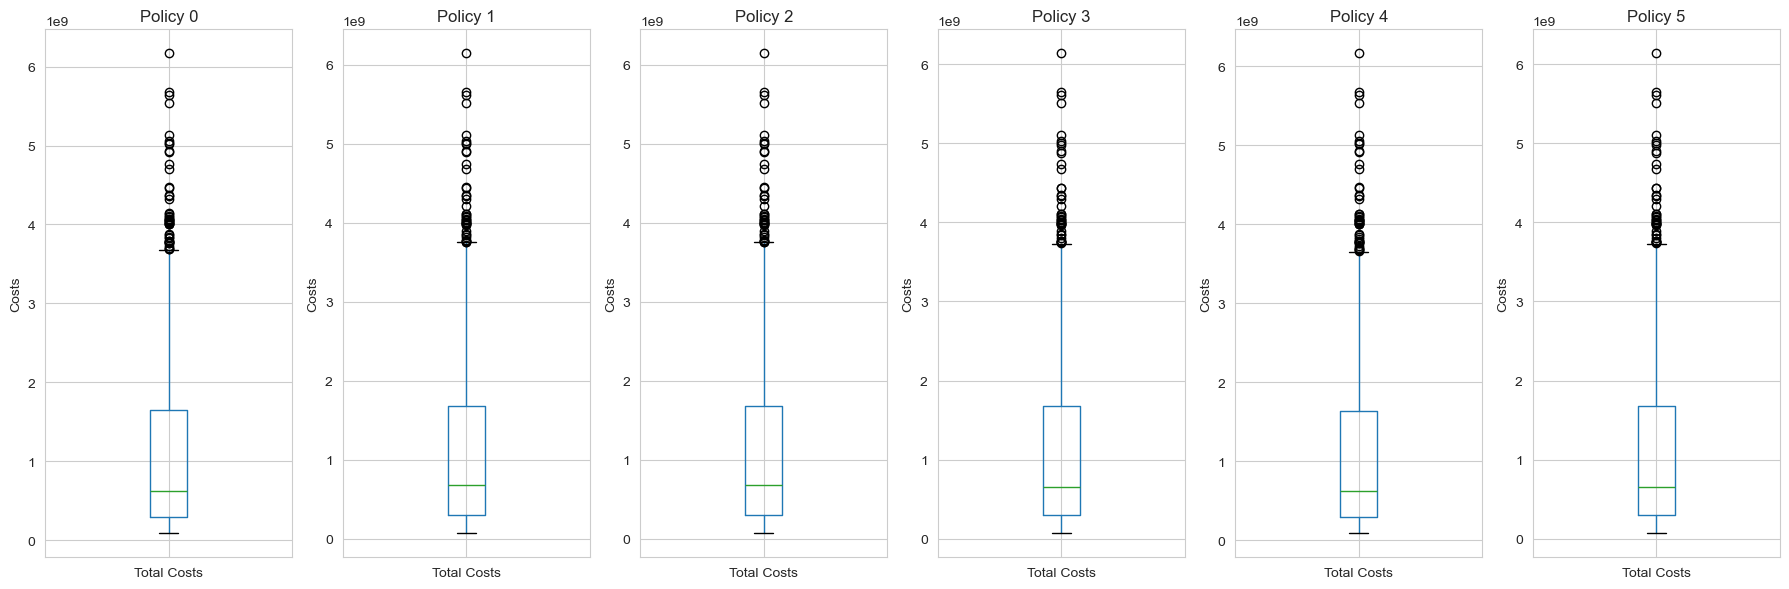

In [14]:
import matplotlib.pyplot as plt

# Assuming df_tot_p0, df_tot_p1, df_tot_p2, df_tot_p3, df_tot_p4, df_tot_p5 are your DataFrames for policies 0 to 5 respectively

# Create a list of DataFrames for all policies
dfs = [df_tot_p0, df_tot_p1, df_tot_p2, df_tot_p3, df_tot_p4, df_tot_p5]

# Create a list of policy labels
policy_labels = ['Policy 0', 'Policy 1', 'Policy 2', 'Policy 3', 'Policy 4', 'Policy 5']

# Create the subplots
fig, axs = plt.subplots(1, 6, figsize=(18, 6))

# Iterate over policies and plot boxplots
for i, df in enumerate(dfs):
    # Boxplot for Total Costs
    df[['Total Costs']].boxplot(ax=axs[i])
    axs[i].set_title(policy_labels[i])
    axs[i].set_ylabel('Costs')

# Display the boxplots
plt.tight_layout()
plt.show()

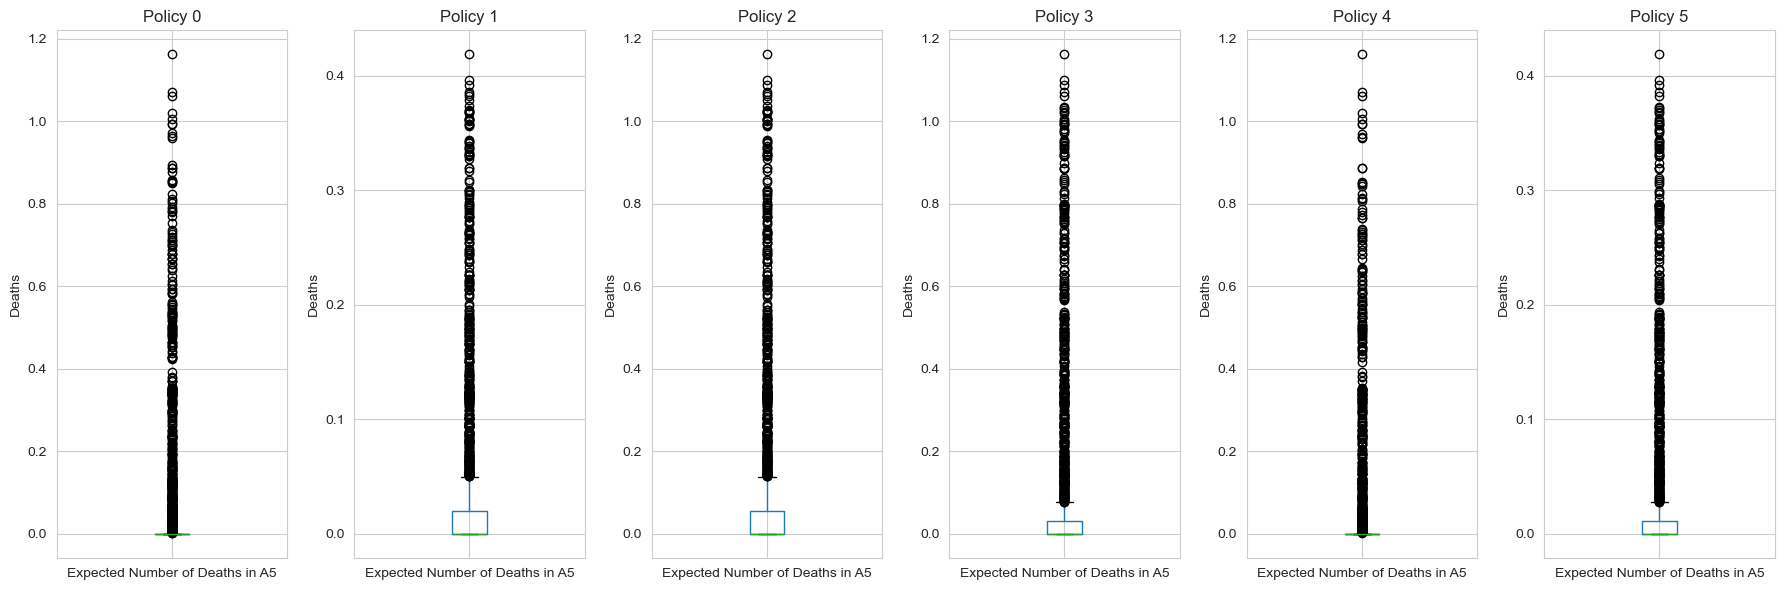

In [16]:
import matplotlib.pyplot as plt

# Assuming df_tot_p0, df_tot_p1, df_tot_p2, df_tot_p3, df_tot_p4, df_tot_p5 are your DataFrames for policies 0 to 5 respectively

# Create a list of DataFrames for all policies
dfs = [df_tot_p0, df_tot_p1, df_tot_p2, df_tot_p3, df_tot_p4, df_tot_p5]

# Create a list of policy labels
policy_labels = ['Policy 0', 'Policy 1', 'Policy 2', 'Policy 3', 'Policy 4', 'Policy 5']

# Create the subplots
fig, axs = plt.subplots(1, 6, figsize=(18, 6))

# Iterate over policies and plot boxplots
for i, df in enumerate(dfs):
    # Boxplot for Total Costs
    df[['Expected Number of Deaths in A5']].boxplot(ax=axs[i])
    axs[i].set_title(policy_labels[i])
    axs[i].set_ylabel('Deaths')

# Display the boxplots
plt.tight_layout()
plt.show()

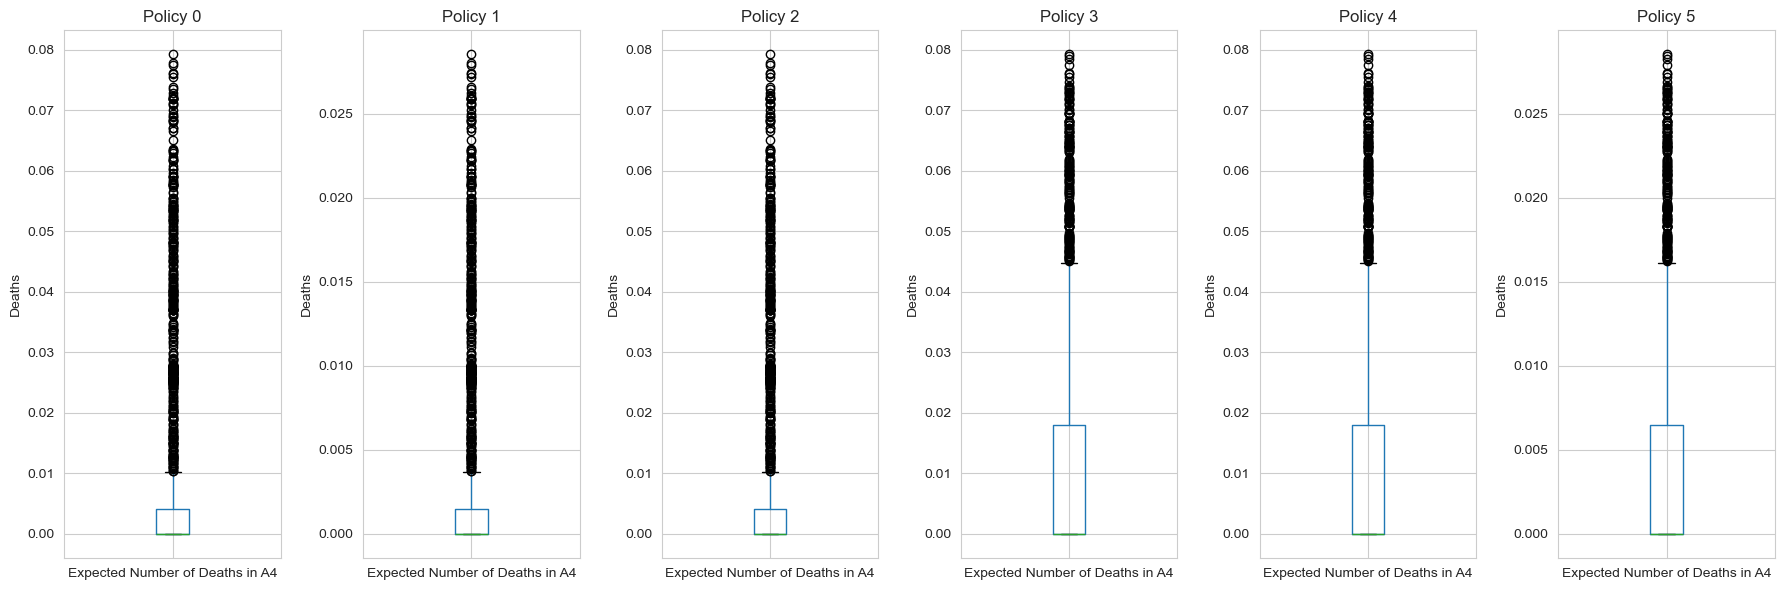

In [17]:
import matplotlib.pyplot as plt

# Assuming df_tot_p0, df_tot_p1, df_tot_p2, df_tot_p3, df_tot_p4, df_tot_p5 are your DataFrames for policies 0 to 5 respectively

# Create a list of DataFrames for all policies
dfs = [df_tot_p0, df_tot_p1, df_tot_p2, df_tot_p3, df_tot_p4, df_tot_p5]

# Create a list of policy labels
policy_labels = ['Policy 0', 'Policy 1', 'Policy 2', 'Policy 3', 'Policy 4', 'Policy 5']

# Create the subplots
fig, axs = plt.subplots(1, 6, figsize=(18, 6))

# Iterate over policies and plot boxplots
for i, df in enumerate(dfs):
    # Boxplot for Total Costs
    df[['Expected Number of Deaths in A4']].boxplot(ax=axs[i])
    axs[i].set_title(policy_labels[i])
    axs[i].set_ylabel('Deaths')

# Display the boxplots
plt.tight_layout()
plt.show()

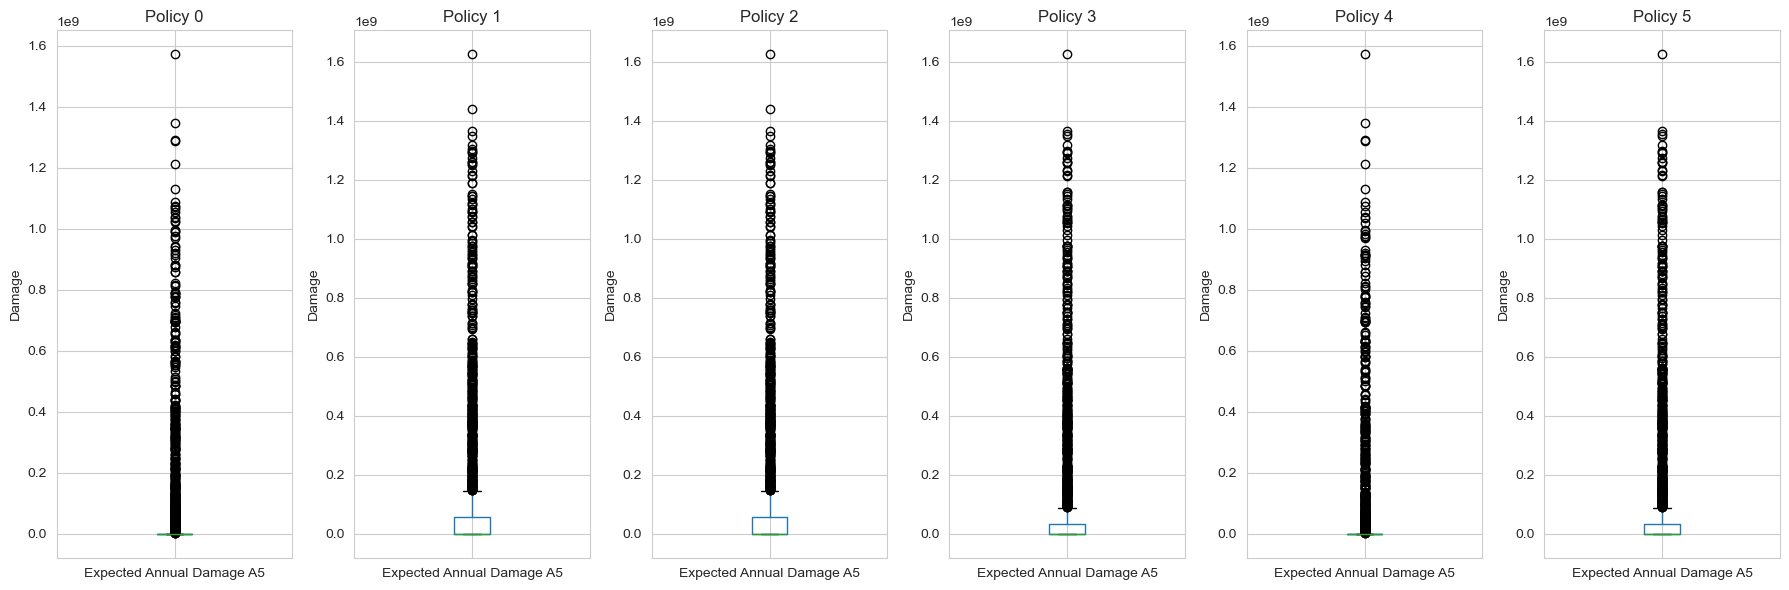

In [18]:
import matplotlib.pyplot as plt

# Assuming df_tot_p0, df_tot_p1, df_tot_p2, df_tot_p3, df_tot_p4, df_tot_p5 are your DataFrames for policies 0 to 5 respectively

# Create a list of DataFrames for all policies
dfs = [df_tot_p0, df_tot_p1, df_tot_p2, df_tot_p3, df_tot_p4, df_tot_p5]

# Create a list of policy labels
policy_labels = ['Policy 0', 'Policy 1', 'Policy 2', 'Policy 3', 'Policy 4', 'Policy 5']

# Create the subplots
fig, axs = plt.subplots(1, 6, figsize=(18, 6))

# Iterate over policies and plot boxplots
for i, df in enumerate(dfs):
    # Boxplot for Total Costs
    df[['Expected Annual Damage A5']].boxplot(ax=axs[i])
    axs[i].set_title(policy_labels[i])
    axs[i].set_ylabel('Damage')

# Display the boxplots
plt.tight_layout()
plt.show()

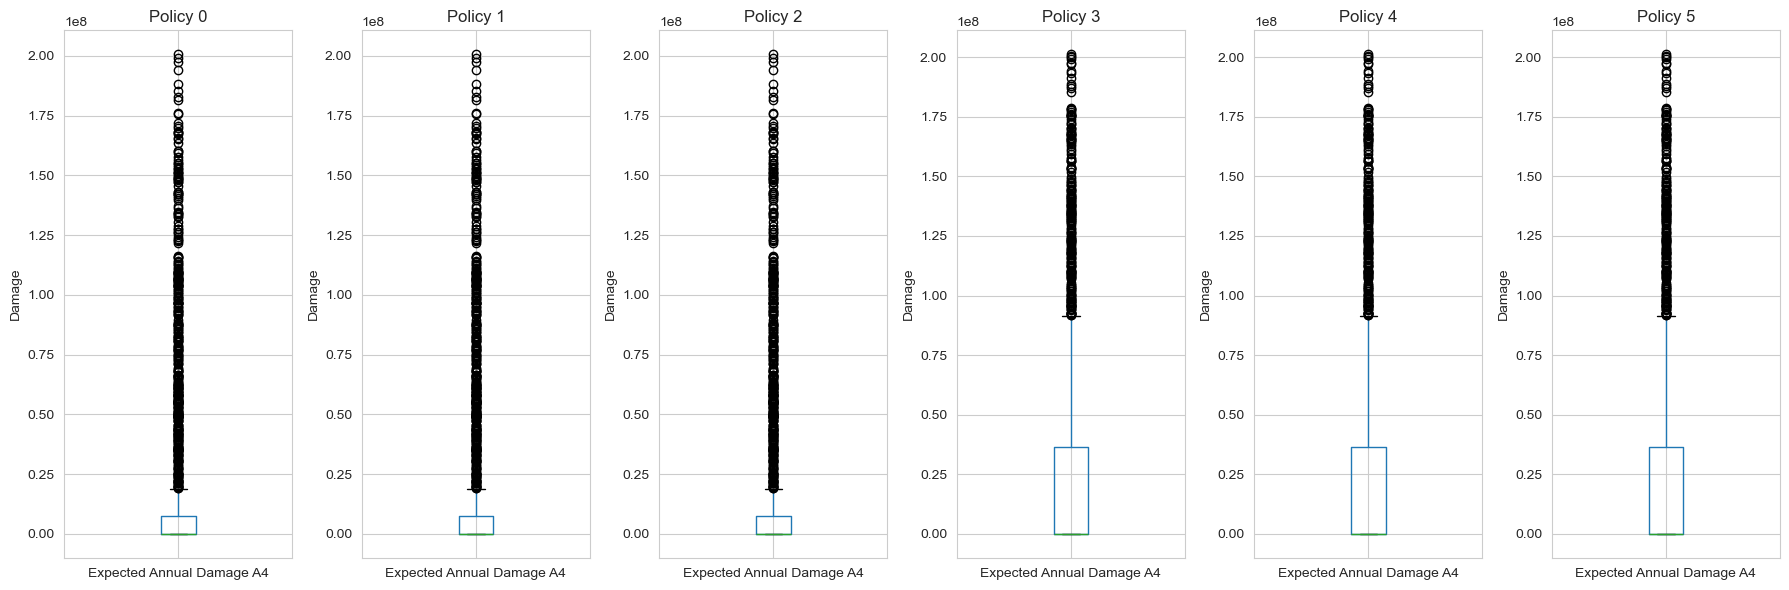

In [20]:
import matplotlib.pyplot as plt

# Assuming df_tot_p0, df_tot_p1, df_tot_p2, df_tot_p3, df_tot_p4, df_tot_p5 are your DataFrames for policies 0 to 5 respectively

# Create a list of DataFrames for all policies
dfs = [df_tot_p0, df_tot_p1, df_tot_p2, df_tot_p3, df_tot_p4, df_tot_p5]

# Create a list of policy labels
policy_labels = ['Policy 0', 'Policy 1', 'Policy 2', 'Policy 3', 'Policy 4', 'Policy 5']

# Create the subplots
fig, axs = plt.subplots(1, 6, figsize=(18, 6))

# Iterate over policies and plot boxplots
for i, df in enumerate(dfs):
    # Boxplot for Total Costs
    df[['Expected Annual Damage A4']].boxplot(ax=axs[i])
    axs[i].set_title(policy_labels[i])
    axs[i].set_ylabel('Damage')

# Display the boxplots
plt.tight_layout()
plt.show()

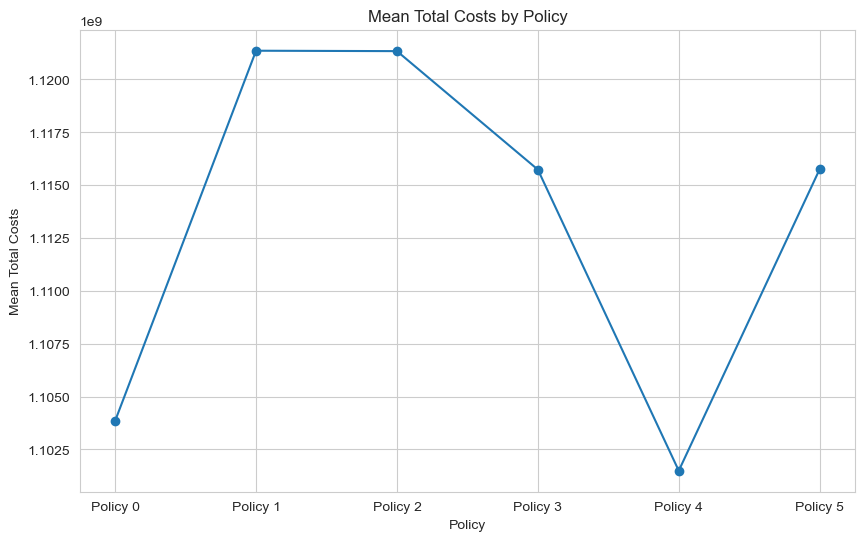

In [21]:
import matplotlib.pyplot as plt

# Calculate mean values for 'Total Costs' for each policy
mean_costs = [df['Total Costs'].mean() for df in dfs]

# Plot the mean values
plt.figure(figsize=(10, 6))
plt.plot(policy_labels, mean_costs, marker='o', linestyle='-')
plt.title('Mean Total Costs by Policy')
plt.xlabel('Policy')
plt.ylabel('Mean Total Costs')
plt.grid(True)
plt.show()

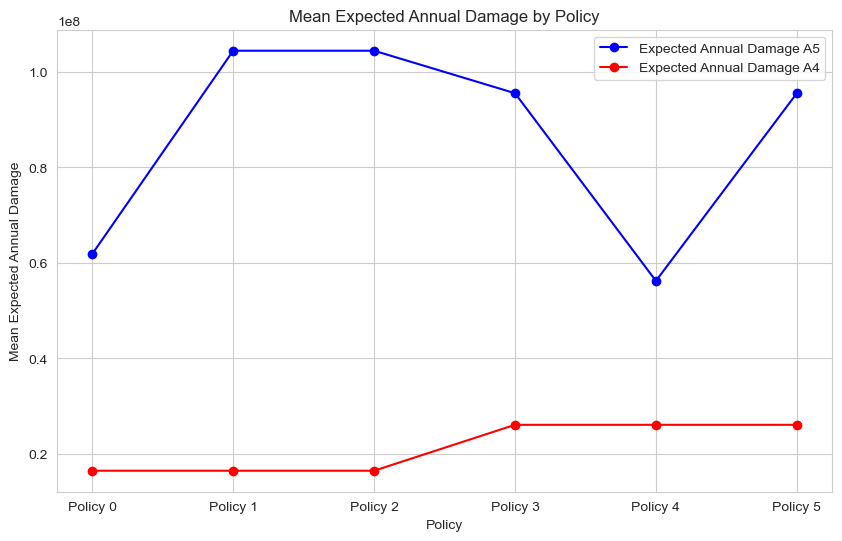

In [22]:
import matplotlib.pyplot as plt

# Calculate mean values for 'Expected Annual Damage A5' and 'Expected Annual Damage A4' for each policy
mean_damage_A5 = [df['Expected Annual Damage A5'].mean() for df in dfs]
mean_damage_A4 = [df['Expected Annual Damage A4'].mean() for df in dfs]

# Plot the mean values for A5
plt.figure(figsize=(10, 6))
plt.plot(policy_labels, mean_damage_A5, marker='o', linestyle='-', label='Expected Annual Damage A5', color='blue')

# Plot the mean values for A4
plt.plot(policy_labels, mean_damage_A4, marker='o', linestyle='-', label='Expected Annual Damage A4', color='red')

plt.title('Mean Expected Annual Damage by Policy')
plt.xlabel('Policy')
plt.ylabel('Mean Expected Annual Damage')
plt.legend()
plt.grid(True)
plt.show()

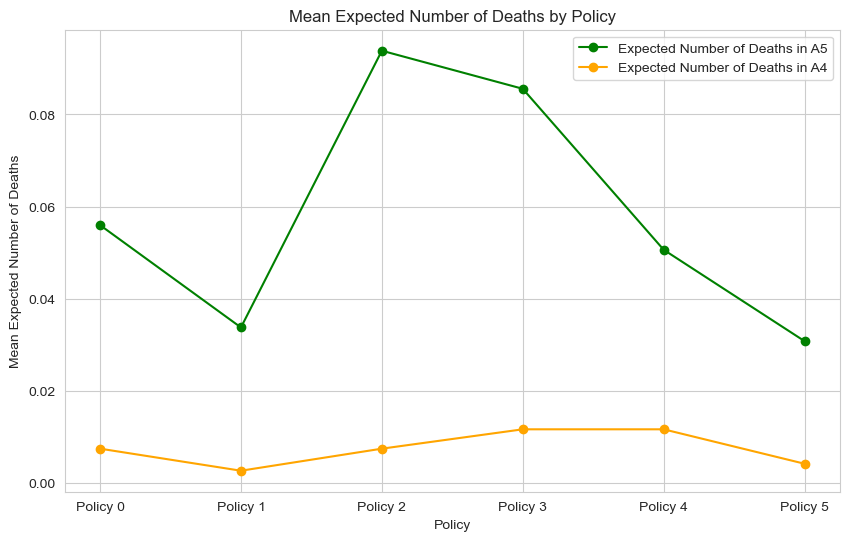

In [23]:
import matplotlib.pyplot as plt

# Calculate mean values for 'Expected Number of Deaths in A5' and 'Expected Number of Deaths in A4' for each policy
mean_deaths_A5 = [df['Expected Number of Deaths in A5'].mean() for df in dfs]
mean_deaths_A4 = [df['Expected Number of Deaths in A4'].mean() for df in dfs]

# Plot the mean values for A5
plt.figure(figsize=(10, 6))
plt.plot(policy_labels, mean_deaths_A5, marker='o', linestyle='-', label='Expected Number of Deaths in A5', color='green')

# Plot the mean values for A4
plt.plot(policy_labels, mean_deaths_A4, marker='o', linestyle='-', label='Expected Number of Deaths in A4', color='orange')

plt.title('Mean Expected Number of Deaths by Policy')
plt.xlabel('Policy')
plt.ylabel('Mean Expected Number of Deaths')
plt.legend()
plt.grid(True)
plt.show()